# Getting familiar

In this notebook, I'm just going to work through some of the examples at https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/modis-data-in-python/.

The purpose is just to get a sense for how MODIS data is structured & how some of these libraries work.

# Open the data

In [1]:
import glob

In [2]:
import os

In [3]:
modis_raw_list = glob.glob(os.path.join("earth-analytics",
                                   "data",
                                   "cold-springs-fire",
                                   "modis",
                                   "reflectance",
                                   "07_july_2016",
                                   "crop",
                                   "*_sur_refl_b*.tif"))

In [4]:
modis_raw_list

['earth-analytics/data/cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b06_1.tif',
 'earth-analytics/data/cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b02_1.tif',
 'earth-analytics/data/cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b07_1.tif',
 'earth-analytics/data/cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b03_1.tif',
 'earth-analytics/data/cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b01_1.tif',
 'earth-analytics/data/cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b05_1.tif',
 'earth-analytics/data/cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b04_1.tif']

In [5]:
import rioxarray as rxr
import xarray as xr

In [6]:
def combine_tifs(tif_list):
    """This function accepts a list of paths to tif files and combines them into an xarray.
    
    ===> Inputs:
        tif_list (list): A list of paths to the tif files.
         

    ===> Returns:
        An xarray containing the combined tif files.
    """
    
    xarr_out = []
    for i, tif_path in enumerate(tif_list):
        xarr_out.append(rxr.open_rasterio(tif_path, masked = True).squeeze())
        xarr_out[i]['band'] = i + 1
        
    return xr.concat(xarr_out, dim = 'band')

In [7]:
modis_raw = combine_tifs(modis_raw_list)

In [8]:
modis_raw

<xarray.DataArray (band: 7, y: 2400, x: 2400)>
array([[[3330., 3560., 3449., ..., 3553., 3553., 3124.],
        [3381., 3449., 3563., ..., 3553., 3058., 3058.],
        [3316., 3144., 3383., ..., 3363., 3351., 2947.],
        ...,
        [3263., 3422., 3422., ..., 1745., 2048., 2555.],
        [3163., 3269., 3422., ..., 2345., 2048., 1972.],
        [3269., 3269., 3315., ..., 2345., 2241., 1820.]],

       [[2714., 2859., 3041., ..., 3046., 3046., 4421.],
        [2968., 3362., 3253., ..., 3046., 4550., 4550.],
        [3198., 3315., 3246., ..., 4178., 4017., 3992.],
        ...,
        [2911., 2947., 2947., ..., 4059., 4907., 3799.],
        [2954., 2890., 2947., ..., 4517., 4907., 3459.],
        [2890., 2890., 2935., ..., 4517., 3728., 4021.]],

       [[2781., 2692., 2801., ..., 2260., 2260., 1534.],
        [2792., 2705., 2684., ..., 2260., 1449., 1449.],
        [2747., 2754., 2733., ..., 1713., 1802., 1548.],
        ...,
...
        ...,
        [1387., 1469., 1469., ...,  343.,  499., 1006.],
        [1298., 1316., 1469., ...,  905.,  499.,  436.],
        [1316., 1316., 1454., ...,  905.,  578.,  351.]],

       [[3421., 3239., 3783., ..., 4108., 4108., 3934.],
        [3673., 3400., 3453., ..., 4108., 4008., 4008.],
        [3404., 3570., 3250., ..., 3936., 3873., 4267.],
        ...,
        [3650., 3384., 3384., ..., 3042., 3937., 3475.],
        [3602., 3320., 3384., ..., 4048., 3937., 3213.],
        [3320., 3320., 3625., ..., 4048., 3413., 3480.]],

       [[1534., 1567., 1527., ..., 1107., 1107., 1069.],
        [1548., 1776., 1665., ..., 1107., 1121., 1121.],
        [1696., 1813., 1820., ..., 1029., 1018., 1077.],
        ...,
        [1209., 1267., 1267., ...,  597.,  788., 1153.],
        [1165., 1154., 1267., ..., 1089.,  788.,  603.],
        [1154., 1154., 1231., ..., 1089.,  759.,  516.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7
  * x            (x) float64 -1.001e+07 -1.001e+07 ... -8.896e+06 -8.896e+06
  * y            (y) float64 4.448e+06 4.447e+06 ... 3.337e+06 3.336e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  10000.0
    add_offset:    0.0
    long_name:     500m Surface Reflectance Band 6 - first layer
    units:         reflectance

In [9]:
modis_raw[1]

<xarray.DataArray (y: 2400, x: 2400)>
array([[2714., 2859., 3041., ..., 3046., 3046., 4421.],
       [2968., 3362., 3253., ..., 3046., 4550., 4550.],
       [3198., 3315., 3246., ..., 4178., 4017., 3992.],
       ...,
       [2911., 2947., 2947., ..., 4059., 4907., 3799.],
       [2954., 2890., 2947., ..., 4517., 4907., 3459.],
       [2890., 2890., 2935., ..., 4517., 3728., 4021.]], dtype=float32)
Coordinates:
    band         int64 2
  * x            (x) float64 -1.001e+07 -1.001e+07 ... -8.896e+06 -8.896e+06
  * y            (y) float64 4.448e+06 4.447e+06 ... 3.337e+06 3.336e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  10000.0
    add_offset:    0.0
    long_name:     500m Surface Reflectance Band 6 - first layer
    units:         reflectance

In [10]:
type(modis_raw)

xarray.core.dataarray.DataArray

# Plot it

In [11]:
import matplotlib.pyplot as plt

In [12]:
import earthpy.plot as epp

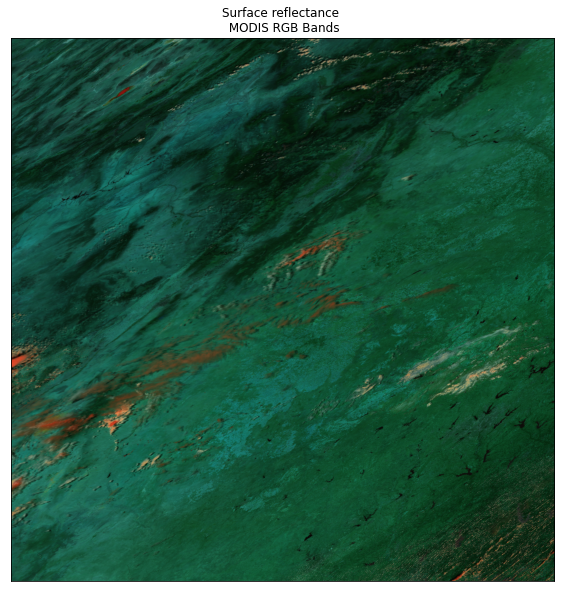

In [47]:
epp.plot_rgb(modis_raw.values,
            rgb = [3, 0, 2],
            title = "Surface reflectance \n MODIS RGB Bands")
plt.show()

**but how do we know that RGB is in bands 0, 3, 2??**
I think the only way to see this is from the data set documentation. It's a shame that the originating file name, etc, isn't saved in the xarray.

**My picture shows the same features as the tutorial, but the colors are totally different...**

# Explore values

In [14]:
modis_raw[1].min(), modis_raw[1].max()

(<xarray.DataArray ()>
 array(-100.)
 Coordinates:
     band         int64 2
     spatial_ref  int64 0,
 <xarray.DataArray ()>
 array(10039.)
 Coordinates:
     band         int64 2
     spatial_ref  int64 0)

# What is the CRS?

In [15]:
modis_raw.rio.crs

CRS.from_wkt('PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [17]:
import geopandas as gpd

Here if I had a geopandas df with shape data, I would reproject it to the same CRS as the MODIS data with:

In [33]:
gdf = gpd.read_file("data/coldspringsfire/vector_layers/fire-boundary-geomac/co_cold_springs_20160711_2200_dd83.shp")

In [36]:
gdf = gdf.to_crs(modis_raw.rio.crs)

<AxesSubplot:>

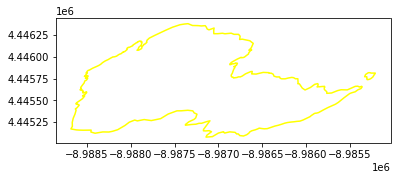

In [39]:
gdf.boundary.plot(color = "yellow")

In [38]:
modis_clip_geo = modis_raw.rio.clip(gdf.geometry,
                                    all_touched = True)

<AxesSubplot:>

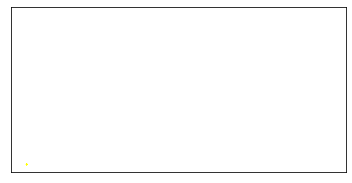

In [52]:
fig, ax1 = plt.subplots()

epp.plot_rgb(modis_clip_geo.values,
             rgb = (3, 0, 2),
             ax = ax1,
             )
gdf.boundary.plot(color = "yellow",
                  ax = ax1)

# A literal copy/paste job from the link at the top

In [59]:
from shapely.geometry import box
from rasterio.plot import plotting_extent

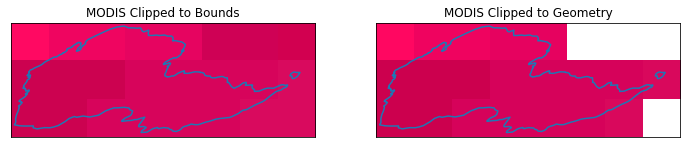

In [61]:
# Open fire boundary
fire_boundary = gpd.read_file("data/coldspringsfire/vector_layers/fire-boundary-geomac/co_cold_springs_20160711_2200_dd83.shp")
fire_bound_sin = fire_boundary.to_crs(modis_raw.rio.crs)

fire_bound_box = [box(*fire_bound_sin.total_bounds)]


# MODIS Clipped to Geometry
modis_clip_geometry = modis_raw.rio.clip(fire_bound_sin.geometry,
                                               all_touched=True,
                                               from_disk=True)

# MODIS Clipped to Bounds
modis_clip = modis_raw.rio.clip(fire_bound_box,
                                      all_touched=True,
                                      from_disk=True)

extent = plotting_extent(modis_clip[0].values, modis_clip.rio.transform())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 15))

# Plotting Geometry Clip
epp.plot_rgb(modis_clip.values,
            rgb=[0, 3, 2],
            ax=ax1,
            extent=extent,
            title='MODIS Clipped to Bounds')

fire_bound_sin.boundary.plot(ax=ax1)

# Plotting Bounds Clip
epp.plot_rgb(modis_clip_geometry.values,
            rgb=[0, 3, 2],
            ax=ax2,
            extent=extent,
            title='MODIS Clipped to Geometry')

fire_bound_sin.boundary.plot(ax=ax2)

plt.show()

# OK cool, let's just tweak this for my census tracts

In [62]:
modis_raw_ca_list = glob.glob(os.path.join("data",
                                        "modis",
                                        "MYD13Q1.061*2022137*.tif"))

In [63]:
modis_raw_ca_list

['data/modis/MYD13Q1.061__250m_16_days_sun_zenith_angle_doy2022137_aid0001.tif',
 'data/modis/MYD13Q1.061__250m_16_days_view_zenith_angle_doy2022137_aid0001.tif',
 'data/modis/MYD13Q1.061__250m_16_days_MIR_reflectance_doy2022137_aid0001.tif',
 'data/modis/MYD13Q1.061__250m_16_days_NDVI_doy2022137_aid0001.tif',
 'data/modis/MYD13Q1.061__250m_16_days_pixel_reliability_doy2022137_aid0001.tif',
 'data/modis/MYD13Q1.061__250m_16_days_VI_Quality_doy2022137_aid0001.tif',
 'data/modis/MYD13Q1.061__250m_16_days_relative_azimuth_angle_doy2022137_aid0001.tif',
 'data/modis/MYD13Q1.061__250m_16_days_red_reflectance_doy2022137_aid0001.tif',
 'data/modis/MYD13Q1.061__250m_16_days_composite_day_of_the_year_doy2022137_aid0001.tif',
 'data/modis/MYD13Q1.061__250m_16_days_EVI_doy2022137_aid0001.tif',
 'data/modis/MYD13Q1.061__250m_16_days_NIR_reflectance_doy2022137_aid0001.tif',
 'data/modis/MYD13Q1.061__250m_16_days_blue_reflectance_doy2022137_aid0001.tif']

In [64]:
modis_raw_ca = combine_tifs(modis_raw_ca_list)
modis_raw_ca.shape

(12, 547, 794)

<AxesSubplot:title={'center':'MODIS Clipped to Geometry'}>

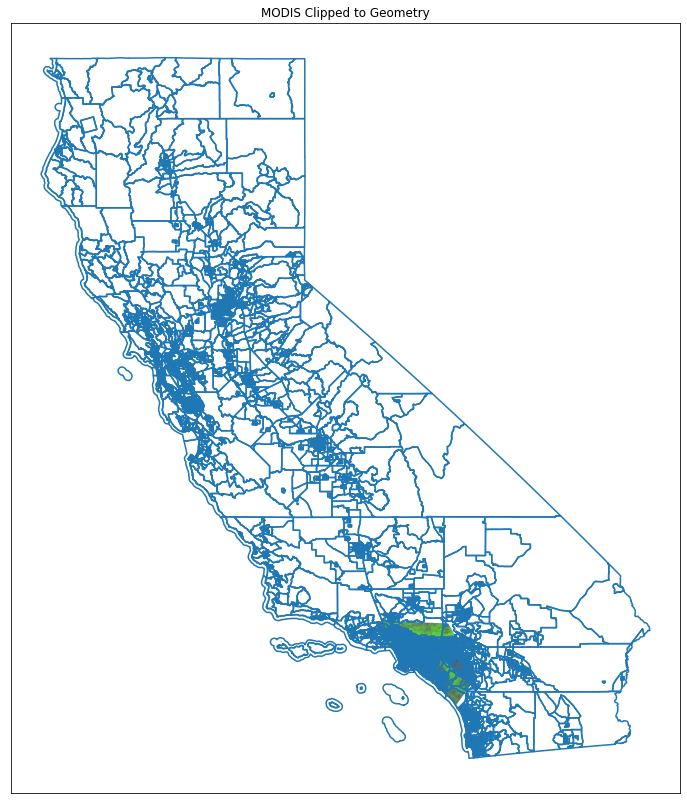

In [72]:
# Open fire boundary
fire_boundary = gpd.read_file("data/census-tracts/tl_2020_06_tract.shp")
fire_bound_sin = fire_boundary.to_crs(modis_raw_ca.rio.crs)

# MODIS Clipped to Geometry
modis_clip_geometry = modis_raw_ca.rio.clip(fire_bound_sin.geometry,
                                               all_touched=True,
                                               from_disk=True)

extent = plotting_extent(modis_clip[0].values, modis_clip.rio.transform())

fig, ax2 = plt.subplots(figsize=(12, 15))

# Plotting Geometry Clip
epp.plot_rgb(modis_clip_geometry.values,
            rgb=[0, 3, 2],
            ax=ax2,
            extent=extent,
            title='MODIS Clipped to Geometry')

fire_bound_sin.boundary.plot(ax=ax2)


In [77]:
plotting_extent(modis_raw[0].values, modis_raw.rio.transform())

(-10007554.677, -8895604.157333, 3335851.559, 4447802.078667)